# Recognize digits pattern in loaded images with Dropout 

In [1]:
from keras.datasets import mnist
import matplotlib.pyplot as plt

In [2]:
# Load the MNIST Dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

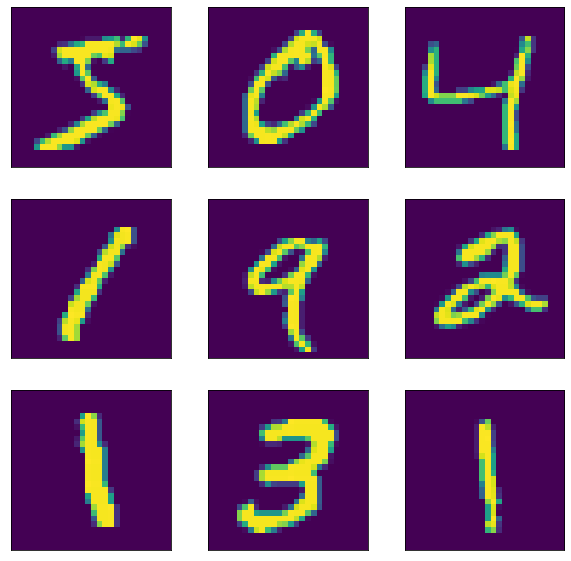

In [3]:
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(X_train[i])

In [4]:
import numpy
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.layers import Dropout
from keras.utils import np_utils

In [5]:
num_pixels = X_train.shape[1] * X_train.shape[2] 
print(num_pixels)

784


In [6]:
X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')

In [7]:
X_train.shape

(60000, 784)

In [8]:
X_train = X_train / 255.
X_test = X_test / 255.

In [9]:
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In [10]:
X_train[0].shape

(784,)

In [11]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [21]:
from keras import regularizers

def base_models():
    model = Sequential()                    
    model.add(Dense(256, input_dim=num_pixels, kernel_initializer='normal', activation='relu'))
    Dropout(0.40)
    model.add(Dense(256, kernel_initializer='normal', activation='relu'))
    Dropout(0.30)
    model.add(Flatten())
    model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
    
# Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# Build the Model
model = base_models()

# Fit the Model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=14, batch_size=200, verbose=2)

# Final Evaluation of the Model
scores = model.evaluate(X_test, y_test, verbose=0)

#print(scores)
print("Error: %.2f%%" % (100-scores[1]*100))

Epoch 1/14
300/300 - 4s - loss: 0.3412 - accuracy: 0.9038 - val_loss: 0.1593 - val_accuracy: 0.9525
Epoch 2/14
300/300 - 3s - loss: 0.1234 - accuracy: 0.9638 - val_loss: 0.0979 - val_accuracy: 0.9699
Epoch 3/14
300/300 - 3s - loss: 0.0804 - accuracy: 0.9759 - val_loss: 0.0919 - val_accuracy: 0.9728
Epoch 4/14
300/300 - 3s - loss: 0.0580 - accuracy: 0.9822 - val_loss: 0.0752 - val_accuracy: 0.9762
Epoch 5/14
300/300 - 3s - loss: 0.0432 - accuracy: 0.9867 - val_loss: 0.0667 - val_accuracy: 0.9799
Epoch 6/14
300/300 - 3s - loss: 0.0315 - accuracy: 0.9906 - val_loss: 0.0789 - val_accuracy: 0.9756
Epoch 7/14
300/300 - 3s - loss: 0.0248 - accuracy: 0.9922 - val_loss: 0.0700 - val_accuracy: 0.9788
Epoch 8/14
300/300 - 3s - loss: 0.0211 - accuracy: 0.9933 - val_loss: 0.0764 - val_accuracy: 0.9784
Epoch 9/14
300/300 - 3s - loss: 0.0160 - accuracy: 0.9953 - val_loss: 0.0744 - val_accuracy: 0.9782
Epoch 10/14
300/300 - 3s - loss: 0.0160 - accuracy: 0.9947 - val_loss: 0.0672 - val_accuracy: 0.9809

In [20]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 256)               200960    
_________________________________________________________________
dense_17 (Dense)             (None, 256)               65792     
_________________________________________________________________
flatten_5 (Flatten)          (None, 256)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 10)                2570      
Total params: 269,322
Trainable params: 269,322
Non-trainable params: 0
_________________________________________________________________
